# Population analysis

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re

In [28]:
bchla_pops = np.array([0 for i in range(27)])
dft_pops = np.array([0 for i in range(27)])
xtb_pops = np.array([0 for i in range(27)])

bchla_qs = np.array([0 for i in range(27)])
dft_qs = np.array([0 for i in range(27)])
xtb_qs = np.array([0 for i in range(27)])

for root, dirs, files in os.walk('.'):
    for f in files:
        if "out" in f:
            lines = list(open(f).readlines())
            for line in lines:
                if "1        Mg" in line:
                    method = f.split("_")[0]
                    pop_charge = re.findall(r'-?\d+.?\d+', line)
                    pop = float(pop_charge[0])
                    charge = float(pop_charge[1])
                    
                    chromophore = int(re.findall(r'\d+', f)[0]) -1
                                        
                    if method == "bchla":
                        bchla_pops[chromophore] = pop
                        bchla_qs[chromophore] = charge
                    elif method == "dft":
                        dft_pops[chromophore] = pop
                        dft_qs[chromophore] = charge
                    elif method == "xtb":
                        xtb_pops[chromophore] = pop
                        xtb_qs[chromophore] = charge


In [38]:
print("avg. Mg (valence) population")
print(f'BChla-xtb : {np.mean(bchla_pops):3.3f}')
print(f'DFT : {np.mean(dft_pops) - 10:3.3f}')
print(f'GFN0-xtb : {np.mean(xtb_pops):3.3f}')

avg. Mg (valence) population
BChla-xtb : 2.446
DFT : 1.021
GFN0-xtb : 0.308


In [40]:
print("avg. Mg Mulliken (partial) charge")
print(f'BChla-xtb : {np.mean(bchla_qs):3.3f}')
print(f'DFT : {np.mean(dft_qs):3.3f}')
print(f'GFN0-xtb : {np.mean(xtb_qs):3.3f}')

avg. Mg (valence) charge
BChla-xtb : -0.446
DFT : 0.979
GFN0-xtb : 1.692


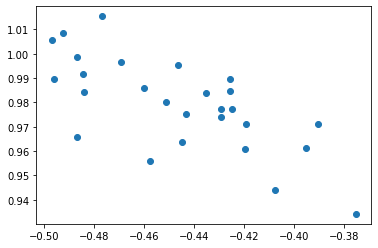

In [42]:
fig, ax = plt.subplots()

ax.scatter(bchla_qs, dft_qs)


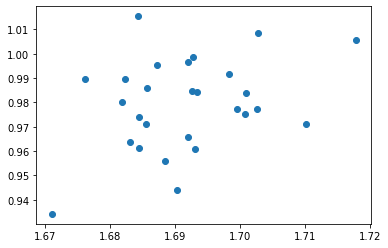

In [43]:
fig, ax = plt.subplots()

ax.scatter(xtb_qss, dft_qs)